# MS to EN

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/ms-en-translation](https://github.com/huseinzol05/Malaya/tree/master/example/ms-en-translation).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time

import malaya

CPU times: user 4.96 s, sys: 676 ms, total: 5.63 s
Wall time: 4.64 s


### List available Transformer models

In [2]:
malaya.translation.ms_en.available_transformer()

INFO:root:tested on 100k MY-EN sentences.


,Size (MB),Quantized Size (MB),BLEU
small,42.7,13.4,0.626
base,234.0,82.7,0.792
large,815.0,244.0,0.714


We tested on 100k MY-EN sentences.

### Load Transformer models

```python
def transformer(model: str = 'base', quantized: bool = False, **kwargs):
    """
    Load Transformer encoder-decoder model to translate MS-to-EN.

    Parameters
    ----------
    model : str, optional (default='base')
        Model architecture supported. Allowed values:

        * ``'small'`` - Transformer SMALL parameters.
        * ``'base'`` - Transformer BASE parameters.
        * ``'large'`` - Transformer LARGE parameters.
    
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: malaya.model.tf.Translation class
    """
```

In [4]:
transformer = malaya.translation.ms_en.transformer()
transformer_small = malaya.translation.ms_en.transformer(model = 'small')
transformer_large = malaya.translation.ms_en.transformer(model = 'large')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [ ]:
quantized_transformer = malaya.translation.ms_en.transformer(quantized = True)

### Translate

#### Using greedy decoder

```python
def greedy_decoder(self, strings: List[str]):
    """
    translate list of strings.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: List[str]
    """
```

#### Using beam decoder

```python
def beam_decoder(self, strings: List[str]):
    """
    translate list of strings using beam decoder, beam width size 3, alpha 0.5 .

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: List[str]
    """
```

**For better results, we suggest do not to try translate more than 200 words, always split by end of sentences**.

In [4]:
from pprint import pprint

In [5]:
# https://www.sinarharian.com.my/article/89678/BERITA/Politik/Saya-tidak-mahu-sentuh-isu-politik-Muhyiddin

string_news1 = 'TANGKAK - Tan Sri Muhyiddin Yassin berkata, beliau tidak mahu menyentuh mengenai isu politik buat masa ini, sebaliknya mahu menumpukan kepada soal kebajikan rakyat serta usaha merancakkan semula ekonomi negara yang terjejas berikutan pandemik Covid-19. Perdana Menteri menjelaskan perkara itu ketika berucap pada Majlis Bertemu Pemimpin bersama pemimpin masyarakat Dewan Undangan Negeri (DUN) Gambir di Dewan Serbaguna Bukit Gambir hari ini.'
pprint(string_news1)

('TANGKAK - Tan Sri Muhyiddin Yassin berkata, beliau tidak mahu menyentuh '
 'mengenai isu politik buat masa ini, sebaliknya mahu menumpukan kepada soal '
 'kebajikan rakyat serta usaha merancakkan semula ekonomi negara yang terjejas '
 'berikutan pandemik Covid-19. Perdana Menteri menjelaskan perkara itu ketika '
 'berucap pada Majlis Bertemu Pemimpin bersama pemimpin masyarakat Dewan '
 'Undangan Negeri (DUN) Gambir di Dewan Serbaguna Bukit Gambir hari ini.')


In [6]:
# https://www.sinarharian.com.my/article/90021/BERITA/Politik/Tun-Mahathir-Anwar-disaran-bersara-untuk-selesai-kemelut-politik

string_news2 = 'ALOR SETAR - Kemelut politik Pakatan Harapan (PH) belum berkesudahan apabila masih gagal memuktamadkan calon Perdana Menteri yang dipersetujui bersama. Ahli Parlimen Sik, Ahmad Tarmizi Sulaiman berkata, sehubungan itu pihaknya mencadangkan mantan Pengerusi Parti Pribumi Bersatu Malaysia (Bersatu), Tun Dr Mahathir Mohamad dan Presiden Parti Keadilan Rakyat (PKR), Datuk Seri Anwar Ibrahim mengundurkan diri daripada politik sebagai jalan penyelesaian.'
pprint(string_news2)

('ALOR SETAR - Kemelut politik Pakatan Harapan (PH) belum berkesudahan apabila '
 'masih gagal memuktamadkan calon Perdana Menteri yang dipersetujui bersama. '
 'Ahli Parlimen Sik, Ahmad Tarmizi Sulaiman berkata, sehubungan itu pihaknya '
 'mencadangkan mantan Pengerusi Parti Pribumi Bersatu Malaysia (Bersatu), Tun '
 'Dr Mahathir Mohamad dan Presiden Parti Keadilan Rakyat (PKR), Datuk Seri '
 'Anwar Ibrahim mengundurkan diri daripada politik sebagai jalan penyelesaian.')


In [7]:
string_news3 = 'Menteri Kanan (Kluster Keselamatan) Datuk Seri Ismail Sabri Yaakob berkata, kelonggaran itu diberi berikutan kerajaan menyedari masalah yang dihadapi mereka untuk memperbaharui dokumen itu. Katanya, selain itu, bagi rakyat asing yang pas lawatan sosial tamat semasa Perintah Kawalan Pergerakan (PKP) pula boleh ke pejabat Jabatan Imigresen yang terdekat untuk mendapatkan lanjutan tempoh.'
pprint(string_news3)

('Menteri Kanan (Kluster Keselamatan) Datuk Seri Ismail Sabri Yaakob berkata, '
 'kelonggaran itu diberi berikutan kerajaan menyedari masalah yang dihadapi '
 'mereka untuk memperbaharui dokumen itu. Katanya, selain itu, bagi rakyat '
 'asing yang pas lawatan sosial tamat semasa Perintah Kawalan Pergerakan (PKP) '
 'pula boleh ke pejabat Jabatan Imigresen yang terdekat untuk mendapatkan '
 'lanjutan tempoh.')


In [8]:
# https://qcikgubm.blogspot.com/2018/02/contoh-soalan-dan-jawapan-karangan.html

string_karangan = 'Selain itu, pameran kerjaya membantu para pelajar menentukan kerjaya yang akan diceburi oleh mereka. Seperti yang kita ketahui, pasaran kerjaya di Malaysia sangat luas dan masih banyak sektor pekerjaan di negara ini yang masih kosong kerana sukar untuk mencari tenaga kerja yang benar-benar berkelayakan. Sebagai contohnya, sektor perubatan di Malaysia menghadapi masalah kekurangan tenaga kerja yang kritikal, khususnya tenaga pakar disebabkan peletakan jawatan oleh doktor dan pakar perubatan untuk memasuki sektor swasta serta berkembangnya perkhidmatan kesihatan dan perubatan. Setelah menyedari  hakikat ini, para pelajar akan lebih berminat untuk menceburi bidang perubatan kerana pameran kerjaya yang dilaksanakan amat membantu memberikan pengetahuan am tentang kerjaya ini'
pprint(string_karangan)

('Selain itu, pameran kerjaya membantu para pelajar menentukan kerjaya yang '
 'akan diceburi oleh mereka. Seperti yang kita ketahui, pasaran kerjaya di '
 'Malaysia sangat luas dan masih banyak sektor pekerjaan di negara ini yang '
 'masih kosong kerana sukar untuk mencari tenaga kerja yang benar-benar '
 'berkelayakan. Sebagai contohnya, sektor perubatan di Malaysia menghadapi '
 'masalah kekurangan tenaga kerja yang kritikal, khususnya tenaga pakar '
 'disebabkan peletakan jawatan oleh doktor dan pakar perubatan untuk memasuki '
 'sektor swasta serta berkembangnya perkhidmatan kesihatan dan perubatan. '
 'Setelah menyedari  hakikat ini, para pelajar akan lebih berminat untuk '
 'menceburi bidang perubatan kerana pameran kerjaya yang dilaksanakan amat '
 'membantu memberikan pengetahuan am tentang kerjaya ini')


In [9]:
# https://www.parlimen.gov.my/bills-dewan-rakyat.html?uweb=dr#, RUU Kumpulan Wang Simpanan Pekerja (Pindaan) 2019

string_parlimen = 'Subfasal 6(b) bertujuan untuk memasukkan subseksyen baharu 39(3) dan (4) ke dalam Akta 452. Subseksyen (3) yang dicadangkan bertujuan untuk menjadikan suatu kesalahan bagi mana-mana orang yang meninggalkan Malaysia tanpa membayar caruman yang tertunggak dan kena dibayar atau mengemukakan jaminan bagi pembayarannya. Subseksyen (4) yang dicadangkan memperuntukkan bahawa bagi maksud seksyen 39 Akta 452, “caruman” termasuklah apa-apa dividen atau caj lewat bayar yang kena dibayar ke atas mana-mana caruman.'
pprint(string_parlimen)

('Subfasal 6(b) bertujuan untuk memasukkan subseksyen baharu 39(3) dan (4) ke '
 'dalam Akta 452. Subseksyen (3) yang dicadangkan bertujuan untuk menjadikan '
 'suatu kesalahan bagi mana-mana orang yang meninggalkan Malaysia tanpa '
 'membayar caruman yang tertunggak dan kena dibayar atau mengemukakan jaminan '
 'bagi pembayarannya. Subseksyen (4) yang dicadangkan memperuntukkan bahawa '
 'bagi maksud seksyen 39 Akta 452, “caruman” termasuklah apa-apa dividen atau '
 'caj lewat bayar yang kena dibayar ke atas mana-mana caruman.')


In [10]:
string_random1 = 'saya menikmati filem mengenai makhluk asing yang menyerang bumi. <> Saya fikir fiksyen sains adalah genre yang luar biasa untuk apa sahaja. Sains masa depan, teknologi, perjalanan masa, perjalanan FTL, semuanya adalah konsep yang menarik. <> Saya sendiri peminat fiksyen sains!'
pprint(string_random1)

('saya menikmati filem mengenai makhluk asing yang menyerang bumi. <> Saya '
 'fikir fiksyen sains adalah genre yang luar biasa untuk apa sahaja. Sains '
 'masa depan, teknologi, perjalanan masa, perjalanan FTL, semuanya adalah '
 'konsep yang menarik. <> Saya sendiri peminat fiksyen sains!')


In [11]:
string_random2 = 'Fiksyen sains <> saya menikmati filem mengenai makhluk asing yang menyerang bumi. <> Fiksyen sains (sering dipendekkan menjadi SF atau sci-fi) adalah genre fiksyen spekulatif, biasanya berurusan dengan konsep khayalan seperti sains dan teknologi futuristik, perjalanan angkasa, perjalanan waktu, lebih cepat daripada perjalanan ringan, alam semesta selari, dan kehidupan di luar bumi .'
pprint(string_random2)

('Fiksyen sains <> saya menikmati filem mengenai makhluk asing yang menyerang '
 'bumi. <> Fiksyen sains (sering dipendekkan menjadi SF atau sci-fi) adalah '
 'genre fiksyen spekulatif, biasanya berurusan dengan konsep khayalan seperti '
 'sains dan teknologi futuristik, perjalanan angkasa, perjalanan waktu, lebih '
 'cepat daripada perjalanan ringan, alam semesta selari, dan kehidupan di luar '
 'bumi .')


#### Comparing with Google Translate

These printscreens taken on 4th July 2020, Google always update model, so Google Translate in the future might improved.

**string_news1**

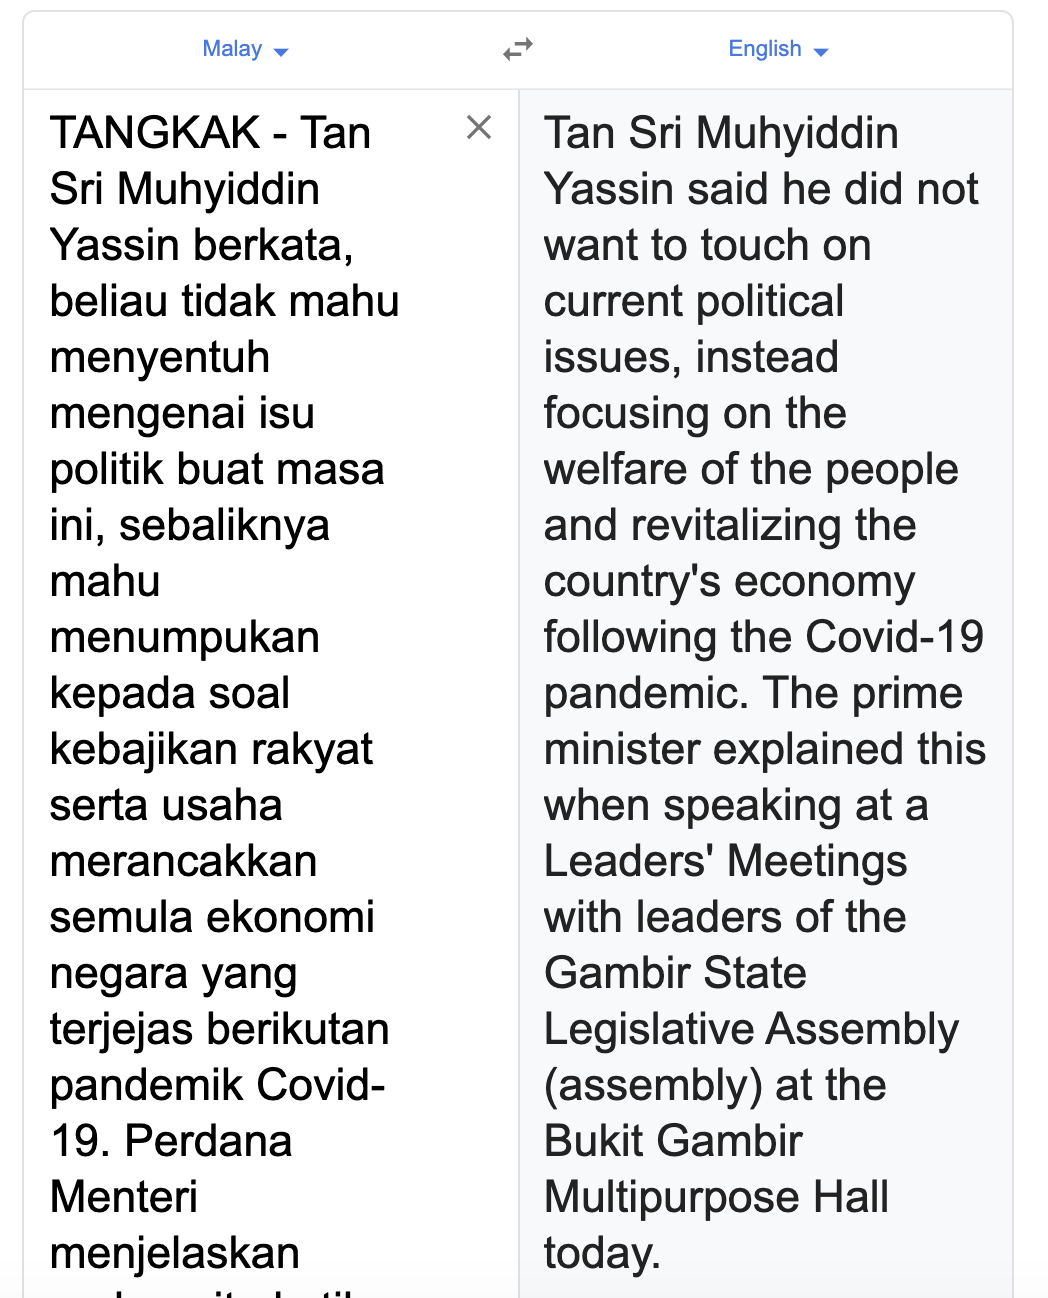

In [13]:
from IPython.core.display import Image, display

display(Image('string1.png', width=450))

Tan Sri Muhyiddin Yassin said he did not want to touch on current political issues, instead focusing on the welfare of the people and revitalizing the country's economy following the Covid-19 pandemic. The prime minister explained this when speaking at a Leaders' Meetings with leaders of the Gambir State Legislative Assembly (assembly) at the Bukit Gambir Multipurpose Hall today.

**string_karangan**

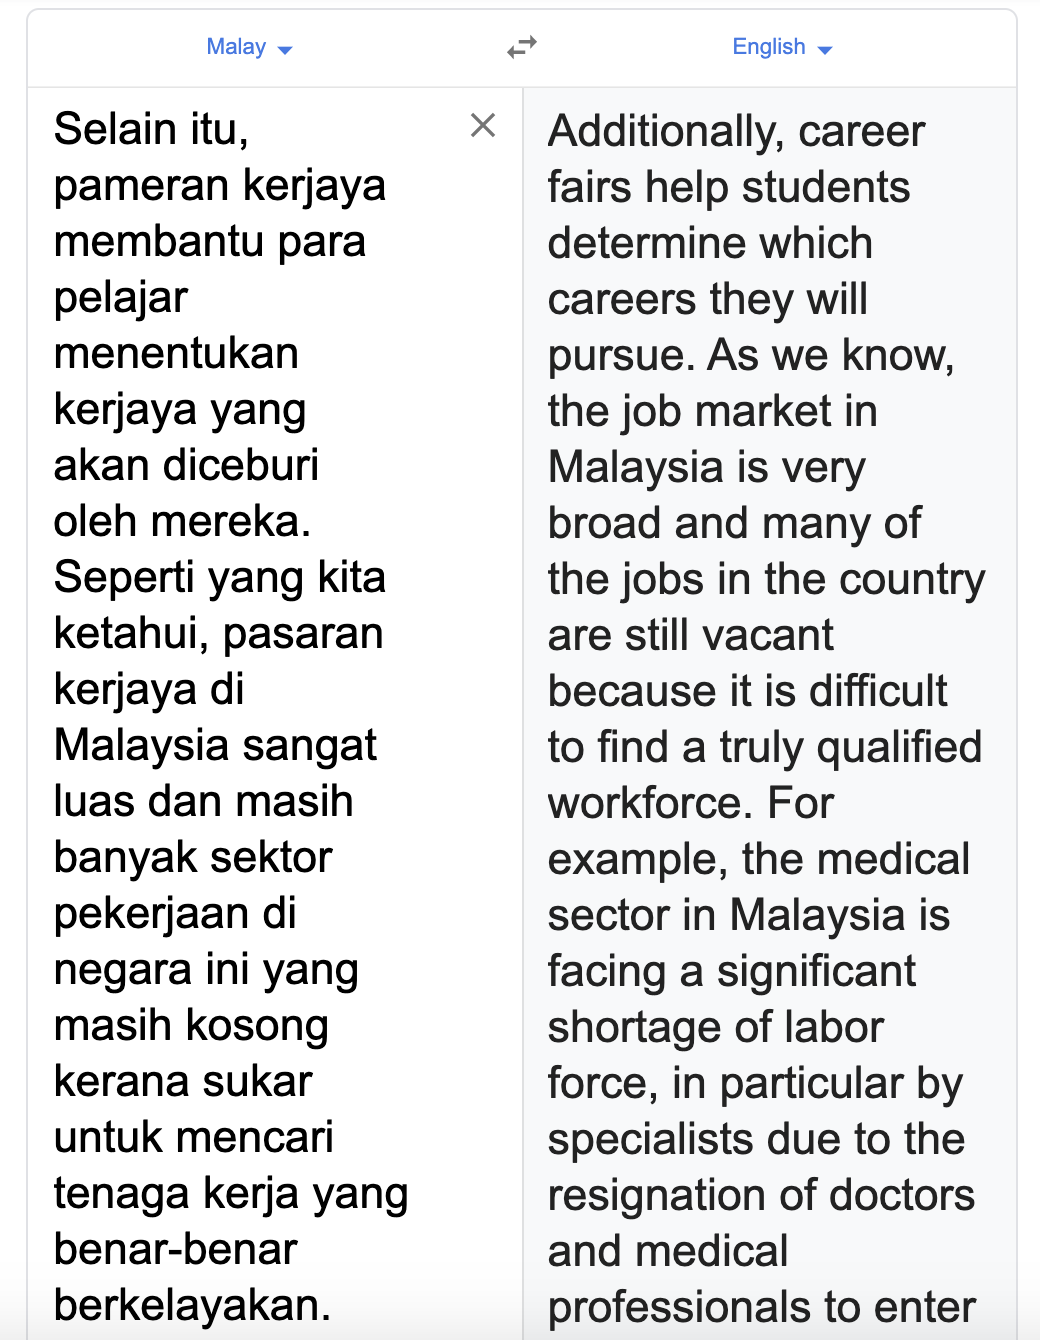

In [14]:
display(Image('string2.png', width=450))

Additionally, career fairs help students determine which careers they will pursue. As we know, the job market in Malaysia is very broad and many of the jobs in the country are still vacant because it is difficult to find a truly qualified workforce. For example, the medical sector in Malaysia is facing a significant shortage of labor force, in particular by specialists due to the resignation of doctors and medical professionals to enter the private sector as well as expanding health and medical services. Upon realizing this fact, students will be more interested in the field of medicine as the career exhibitions help provide a wealth of knowledge about this profession.

**string_parlimen**

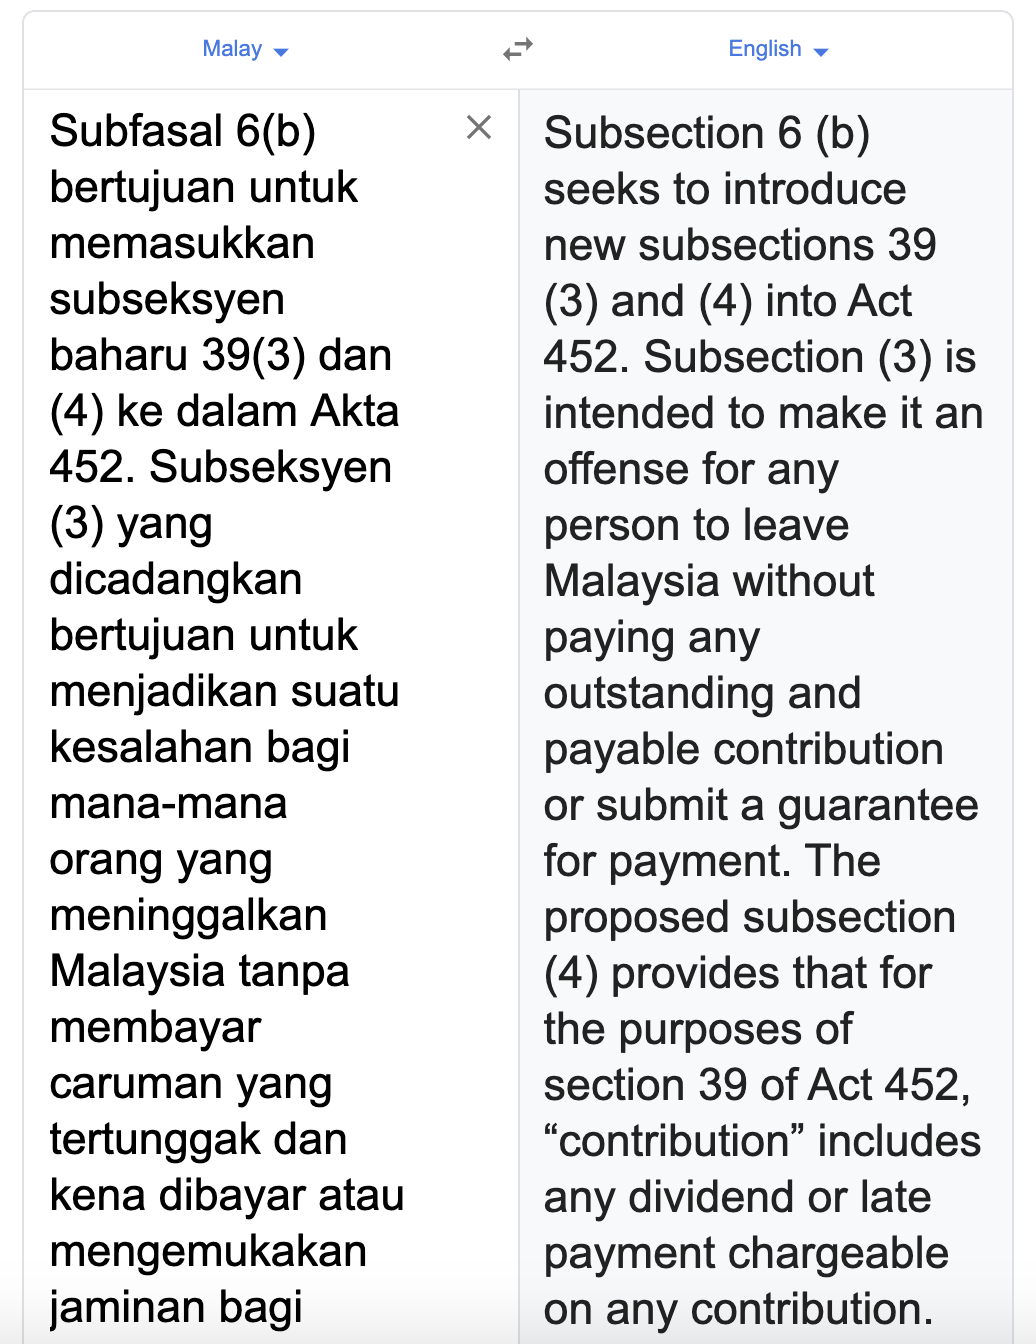

In [15]:
display(Image('string3.png', width=450))

Subsection 6 (b) seeks to introduce new subsections 39 (3) and (4) into Act 452. Subsection (3) is intended to make it an offense for any person to leave Malaysia without paying any outstanding and payable contribution or submit a guarantee for payment. The proposed subsection (4) provides that for the purposes of section 39 of Act 452, “contribution” includes any dividend or late payment chargeable on any contribution.

#### Translate transformer base

In [16]:
%%time

pprint(transformer.greedy_decoder([string_news1, string_news2, string_news3]))

['TANGKAK - Tan Sri Muhyiddin Yassin said he did not want to touch on '
 'political issues at the moment, instead focusing on the welfare of the '
 "people and efforts to revitalize the affected country's economy following "
 'the Covid-19 pandemic. The prime minister explained the matter when speaking '
 'at a Leadership Meeting with Gambir State Assembly (DUN) leaders at the '
 'Bukit Gambir Multipurpose Hall today.',
 'ALOR SETAR - Pakatan Harapan (PH) political turmoil has not ended when it '
 "has failed to finalize the Prime Minister's candidate agreed upon. Sik MP "
 'Ahmad Tarmizi Sulaiman said he had suggested former United Nations (UN) '
 "Indigenous Party chairman Tun Dr Mahathir Mohamad and People's Justice Party "
 '(PKR) president Datuk Seri Anwar Ibrahim resign from politics as a solution.',
 'Senior Minister (Security Cluster) Datuk Seri Ismail Sabri Yaakob said the '
 'relaxation was given as the government was aware of the problems they had to '
 'renew the document. 

In [16]:
%%time

pprint(quantized_transformer.greedy_decoder([string_news1, string_news2, string_news3]))

['TANGKAK - Tan Sri Muhyiddin Yassin said he did not want to touch on '
 'political issues at the moment, instead focusing on the welfare of the '
 "people and efforts to revitalize the affected country's economy following "
 'the Covid-19 pandemic. The prime minister explained the matter when speaking '
 'at a Leadership Meeting with Gambir State Assembly (DUN) leaders at the '
 'Bukit Gambir Multipurpose Hall today.',
 'ALOR SETAR - Pakatan Harapan (PH) political turmoil has not ended when it '
 "has failed to finalize the Prime Minister's candidate agreed upon. Sik MP "
 'Ahmad Tarmizi Sulaiman said he had suggested former United Nations (UN) '
 "Indigenous Party chairman Tun Dr Mahathir Mohamad and People's Justice Party "
 '(PKR) president Datuk Seri Anwar Ibrahim resign from politics as a solution.',
 'Senior Minister (Security Cluster) Datuk Seri Ismail Sabri Yaakob said the '
 'relaxation was given as the government was aware of the problems they had to '
 'renew the document. 

In [17]:
%%time

pprint(transformer.greedy_decoder([string_karangan, string_parlimen]))

['In addition, career exhibitions help students determine their careers. As we '
 'know, the career market in Malaysia is very broad and there are still many '
 'job sectors in the country that are still vacant because it is difficult to '
 'find a truly qualified workforce. For example, the medical sector in '
 'Malaysia is facing a critical shortage of labor, especially specialists due '
 'to the resignation of doctors and physicians to enter the private sector and '
 'develop health and medical services. Upon realizing this fact, students will '
 'be more interested in the medical field as the career exhibitions are very '
 'helpful to provide knowledge of this career.',
 'Subclause 6 (b) seeks to introduce new subsections 39 (3) and (4) into Act '
 '452. Subsection (3) proposed to make an offense for any person leaving '
 'Malaysia without paying a deferred and payable contribution or to submit a '
 'guarantee for payment. Subsection (4) proposed provides that for the purpose '
 'o

In [17]:
%%time

pprint(quantized_transformer.greedy_decoder([string_karangan, string_parlimen]))

['In addition, career exhibitions help students determine their careers. As we '
 'know, the career market in Malaysia is very broad and there are still many '
 'job sectors in the country that are still vacant because it is difficult to '
 'find a truly qualified workforce. For example, the medical sector in '
 'Malaysia is facing a critical shortage of labor, especially specialists due '
 'to the resignation of doctors and physicians to enter the private sector and '
 'develop health and medical services. Upon realizing this fact, students will '
 'be more interested in the medical field as the career exhibitions are very '
 'helpful to provide general knowledge of this career.',
 'Subclause 6 (b) seeks to introduce new subsections 39 (3) and (4) into Act '
 '452. Subsection (3) proposed to make an offense for any person leaving '
 'Malaysia without paying a deferred and payable contribution or to submit a '
 'guarantee for his payment. Subsection (4) proposed provides that for the '

In [18]:
%%time

result = transformer.greedy_decoder([string_random1, string_random2])
pprint(result)

['I enjoy movies about aliens attacking the earth. <> I think science fiction '
 'is an incredible genre for anything. Future science, technology, time '
 "travel, FTL travel, everything is an exciting concept. <> I'm a science "
 'fiction fan!',
 'Science fiction <> I enjoy movies about aliens invading the earth. <> '
 'Science fiction (often shortened to SF or sci-fi) is a genre of speculative '
 'fiction, usually dealing with imaginary concepts such as science and '
 'futuristic technology, space travel, time travel, faster than light travel, '
 'parallel universe, and life abroad.']
CPU times: user 18.8 s, sys: 10.2 s, total: 28.9 s
Wall time: 6.89 s


In [18]:
%%time

result = quantized_transformer.greedy_decoder([string_random1, string_random2])
pprint(result)

['I enjoy movies about aliens attacking the earth. <> I think science fiction '
 'is an incredible genre for anything. Future science, technology, time '
 "travel, FTL travel, everything is an exciting concept. <> I'm a science "
 'fiction fan!',
 'Science fiction <> I enjoy movies about aliens invading the earth. <> '
 'Science fiction (often shortened to SF or sci-fi) is a genre of speculative '
 'fiction, usually dealing with imaginary concepts such as science and '
 'futuristic technology, space travel, time travel, faster than light travel, '
 'parallel universe, and life abroad.']
CPU times: user 19 s, sys: 11.1 s, total: 30.1 s
Wall time: 7.12 s


In [19]:
actual_string1 = "i enjoy movies about aliens invading the earth. <> I think science fiction is an amazing genre for anything. Future science, technology, time travel, FTL travel, they're all such interesting concepts. <> I'm a huge fan of science fiction myself! "
actual_string2 = 'Science fiction <> i enjoy movies about aliens invading the earth. <> Science fiction (often shortened to SF or sci-fi) is a genre of speculative fiction, typically dealing with imaginative concepts such as futuristic science and technology, space travel, time travel, faster than light travel, parallel universes, and extraterrestrial life.'

In [20]:
from tensor2tensor.utils import bleu_hook

In [21]:
encoded_reference = [transformer._tokenizer.encode(s) for s in [actual_string1, actual_string2]]
encoded_translation = [transformer._tokenizer.encode(s) for s in result]

In [22]:
bleu_hook.compute_bleu(reference_corpus = encoded_reference, 
                       translation_corpus = encoded_translation)

0.6765955

#### Translate transformer small

In [23]:
%%time

pprint(transformer_small.greedy_decoder([string_news1, string_news2, string_news3]))

['TANGKAK - Tan Sri Muhyiddin Yassin said he did not want to touch on '
 'political issues at this time, instead focusing on the welfare of the people '
 "and efforts to revitalize the country's economy affected following the "
 'Covid-19 pandemic. The Prime Minister explained the matter when speaking at '
 'the Leaders Meeting with the leaders of the Gambir State Assembly (DUN) '
 'community at the Bukit Gambir Multipurpose Hall today.',
 'ALOR SETAR - Pakatan Harapan (PH) political turmoil has not been expected '
 "when it still fails to finalize the Prime Minister's candidate agreed "
 'together. Sik MP Ahmad Tarmizi Sulaiman said the party had suggested former '
 'United Nations Indigenous Party (UN) chairman Tun Dr Mahathir Mohamad and '
 "President of the People's Justice Party (PKR), Datuk Seri Anwar Ibrahim "
 'resigned from politics as a solution.',
 'Senior Minister (Security Cluster) Datuk Seri Ismail Sabri Yaakob said the '
 'relaxation was given as the government was aware

In [24]:
%%time

pprint(transformer_small.greedy_decoder([string_karangan, string_parlimen]))

['In addition, career exhibitions help students determine their careers. As we '
 'know, the career market in Malaysia is very broad and many employment '
 'sectors in the country are still vacant because it is difficult to find a '
 'truly qualified workforce. For example, the medical sector in Malaysia is '
 'facing critical labor shortages, especially specialists as specialists as it '
 'is difficult to get into the private sector and the development of health '
 'and medical services. After realizing it, students will be more interested '
 'in medicine as the exhibition of careers is helping to assist in providing '
 'general knowledge of this career in providing general knowledge of this '
 'career.',
 'Subclause 6 (b) aims to include a new subsection of 39 (3) and (4) into Act '
 '452. Subsection (3) proposed aimed at making a mistake for any person who '
 'leaves Malaysia without paying for outstanding contributions and payable or '
 'to provide bail for his payment. Subsection 

In [25]:
%%time

result = transformer_small.greedy_decoder([string_random1, string_random2])
pprint(result)

['I enjoy movies about aliens attacking the earth. <> I think science fiction '
 'is a great genre for whatever future science, technology, travel, FTL '
 'travel, all of which is an interesting concept. <> I personally love science '
 'fiction!',
 'science fiction <> I enjoy movies about aliens who attack the earth. <> The '
 'science fiction (often shortened to SF or sci-fi) is a speculative fiction '
 'genre, usually dealing with the concept of imaginary science and futuristic '
 'technology, space travel, travel, faster than light travel, parallel '
 'universe, and outer life.']
CPU times: user 2.67 s, sys: 385 ms, total: 3.06 s
Wall time: 808 ms


In [26]:
encoded_reference = [transformer._tokenizer.encode(s) for s in [actual_string1, actual_string2]]
encoded_translation = [transformer._tokenizer.encode(s) for s in result]

In [27]:
bleu_hook.compute_bleu(reference_corpus = encoded_reference, 
                       translation_corpus = encoded_translation)

0.47044232

#### Translate transformer large

In [28]:
%%time

pprint(transformer_large.greedy_decoder([string_news1, string_news2, string_news3]))

['TANGKAK - Tan Sri Muhyiddin Yassin said he did not want to touch on '
 'political issues at the moment, instead focusing on the welfare of the '
 "people and efforts to revitalize the country's economy affected by the "
 'Covid-19 pandemic. The prime minister explained the matter when speaking at '
 'a meeting of Leaders with the State Assembly (DUN) leaders in the Bukit '
 'Gambir Multipurpose Hall today.',
 'ALOR SETAR - Pakatan Harapan (PH) political turmoil has not ended when it '
 "failed to finalize the Prime Minister's candidate agreed. Sik MP Ahmad "
 "Tarmizi Sulaiman said the party had suggested that former United People's "
 'Party (UN) chairman Tun Dr Mahathir Mohamad and PKR president Datuk Seri '
 'Anwar Ibrahim resign from politics as a solution.',
 'Senior Minister (Security Cluster) Datuk Seri Ismail Sabri Yaakob said the '
 'relaxation was given as the government recognized the problems they were '
 'facing in renewing the document. He said that for foreigners who h

In [37]:
%%time

pprint(transformer_large.greedy_decoder([string_karangan, string_parlimen]))

['In addition, career exhibitions help students determine their careers to be '
 'involved. As we know, the Malaysian job market is very broad and there are '
 'still many jobs in the country that are still vacant because it is difficult '
 'to find a truly qualified workforce. For example, the medical sector in '
 'Malaysia is facing a shortage of critical labor, especially for specialists '
 'due to the resignation of doctors and physicians to enter the private sector '
 'and develop health and medical services. After realizing this fact, students '
 'will be more interested in getting involved in medicine because the '
 'exhibition profession is very helpful in this career knowledge about the '
 'profession.',
 'Subclause 6 (b) seeks to include new subsection 39 (3) and (4) of Act 452. '
 'The proposed subsection (3) seeks to make an offense for any person leaving '
 'Malaysia without paying the outstanding and payable contribution or '
 'submitting bail for his payment. Subsection 

In [34]:
%%time

result = transformer_large.greedy_decoder([string_random1, string_random2])
pprint(result)

['I enjoy a movie about aliens who attack the earth. <> I think science '
 'fiction is an incredible genre for anything. Future science, technology, '
 "time travel, FTL travel, are all exciting concepts. <> I'm a science fiction "
 'fan!',
 'The science fiction <> I enjoy movies about aliens who attack the earth. <> '
 'Science fiction (often shortened to SF or sci-fi) is a speculative fiction '
 'genre, usually dealing with imaginary concepts such as science and '
 'futuristic technology, space travel, time travel, faster than light travel, '
 'the universe in parallel, and life outside the earth.']
CPU times: user 1min 7s, sys: 25.7 s, total: 1min 33s
Wall time: 16.2 s


In [35]:
encoded_reference = [transformer._tokenizer.encode(s) for s in [actual_string1, actual_string2]]
encoded_translation = [transformer._tokenizer.encode(s) for s in result]

In [36]:
bleu_hook.compute_bleu(reference_corpus = encoded_reference, 
                       translation_corpus = encoded_translation)

0.60805035